In [1]:
from math import sqrt,pi,exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
dtype = {'row_id': 'int64',
         'timestamp': 'int64',
         'user_id': 'int32',
         'content_id': 'int16',
         'content_type_id': 'int8',
         'task_container_id': 'int16',
         'user_answer': 'int8',
         'answered_correctly': 'int8',
         'prior_question_elapsed_time': 'float32',
         'prior_question_had_explanation': 'boolean'}

columns = ['timestamp','user_id','content_id','content_type_id','user_answer','answered_correctly','prior_question_elapsed_time']

In [3]:
train_df = pd.read_csv(
    '/home/yao/dataset/Riiid-AIEd-Challenge-2020/train.csv',
    header=0,
    usecols=columns,
    dtype=dtype)


train_df = train_df[train_df['prior_question_elapsed_time'].notnull() & 
                    (train_df['answered_correctly']!=-1) & 
                    (train_df['prior_question_elapsed_time']!=0)
                   ]

train_df

,timestamp,user_id,content_id,content_type_id,user_answer,answered_correctly,prior_question_elapsed_time
1,56943,115,5716,0,2,1,37000.0
2,118363,115,128,0,0,1,55000.0
3,131167,115,7860,0,0,1,19000.0
4,137965,115,7922,0,1,1,11000.0
5,157063,115,156,0,2,1,5000.0
...,...,...,...,...,...,...,...
101230327,428564420,2147482888,3586,0,0,1,18000.0
101230328,428585000,2147482888,6341,0,3,1,14000.0
101230329,428613475,2147482888,4212,0,3,1,14000.0
101230330,428649406,2147482888,6343,0,1,0,22000.0


### 准确率统计

In [4]:
train_df1 = train_df.sort_values(['user_id','content_id','timestamp'])

train_df1 = train_df.reset_index(drop=True)
train_df1

,timestamp,user_id,content_id,content_type_id,user_answer,answered_correctly,prior_question_elapsed_time
0,56943,115,5716,0,2,1,37000.0
1,118363,115,128,0,0,1,55000.0
2,131167,115,7860,0,0,1,19000.0
3,137965,115,7922,0,1,1,11000.0
4,157063,115,156,0,2,1,5000.0
...,...,...,...,...,...,...,...
98683972,428564420,2147482888,3586,0,0,1,18000.0
98683973,428585000,2147482888,6341,0,3,1,14000.0
98683974,428613475,2147482888,4212,0,3,1,14000.0
98683975,428649406,2147482888,6343,0,1,0,22000.0


In [5]:
drop_lines = []
last_item = train_df1.iloc[0,:]
for (row,item) in train_df1.iloc[1:,:].iterrows():
        
    if item['content_id'] == last_item['content_id'] and item['user_id'] == last_item['user_id']:
        drop_lines.append(row)
        
    last_item = item

drop_lines

[86,
 211,
 665,
 669,
 693,
 779,
 1974,
 2017,
 2025,
 2041,
 2047,
 2087,
 2142,
 2169,
 2181,
 2202,
 2244,
 2316,
 2502,
 2541,
 2652,
 2692,
 2739,
 2748,
 2758,
 2840,
 2929,
 2975,
 3192,
 3299,
 3332,
 3357,
 3381,
 3513,
 3539,
 3598,
 3633,
 3733,
 3774,
 3841,
 3896,
 4017,
 4117,
 4221,
 4314,
 4511,
 4526,
 4535,
 4560,
 4933,
 4953,
 5130,
 5137,
 5161,
 5937,
 5960,
 6051,
 6521,
 7401,
 7636,
 7725,
 7805,
 7948,
 7981,
 8086,
 8325,
 8345,
 8900,
 9124,
 9151,
 9235,
 9324,
 9342,
 9349,
 9386,
 9400,
 9650,
 9673,
 9682,
 10259,
 10265,
 10268,
 10426,
 10556,
 10559,
 10759,
 10868,
 11262,
 11408,
 13955,
 14245,
 14314,
 15159,
 15785,
 15861,
 17117,
 17535,
 17542,
 17612,
 17712,
 17810,
 18556,
 18559,
 19378,
 19402,
 19453,
 19695,
 19779,
 19801,
 19865,
 19885,
 20903,
 21131,
 21145,
 21153,
 21168,
 21328,
 21338,
 21361,
 21731,
 22079,
 22673,
 22898,
 23279,
 23447,
 23654,
 23676,
 23695,
 23990,
 23994,
 24172,
 24403,
 24406,
 24792,
 25036,
 25333

In [6]:
train_df1 = train_df1.drop(drop_lines,axis=0)

train_df1 = train_df1.reset_index(drop=True)
train_df1

,timestamp,user_id,content_id,content_type_id,user_answer,answered_correctly,prior_question_elapsed_time
0,56943,115,5716,0,2,1,37000.0
1,118363,115,128,0,0,1,55000.0
2,131167,115,7860,0,0,1,19000.0
3,137965,115,7922,0,1,1,11000.0
4,157063,115,156,0,2,1,5000.0
...,...,...,...,...,...,...,...
98196518,428564420,2147482888,3586,0,0,1,18000.0
98196519,428585000,2147482888,6341,0,3,1,14000.0
98196520,428613475,2147482888,4212,0,3,1,14000.0
98196521,428649406,2147482888,6343,0,1,0,22000.0


In [7]:
train_df1['corrected'] = (train_df1['user_answer'] == train_df1['answered_correctly'] )
train_df1

,timestamp,user_id,content_id,content_type_id,user_answer,answered_correctly,prior_question_elapsed_time,corrected
0,56943,115,5716,0,2,1,37000.0,False
1,118363,115,128,0,0,1,55000.0,False
2,131167,115,7860,0,0,1,19000.0,False
3,137965,115,7922,0,1,1,11000.0,True
4,157063,115,156,0,2,1,5000.0,False
...,...,...,...,...,...,...,...,...
98196518,428564420,2147482888,3586,0,0,1,18000.0,False
98196519,428585000,2147482888,6341,0,3,1,14000.0,False
98196520,428613475,2147482888,4212,0,3,1,14000.0,False
98196521,428649406,2147482888,6343,0,1,0,22000.0,False


<AxesSubplot:xlabel='content_id'>

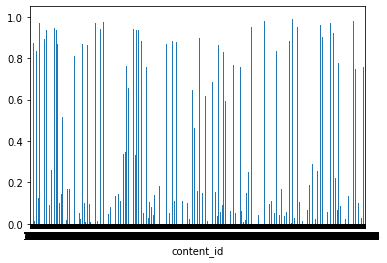

In [8]:
accuracies = train_df1.groupby(['content_id'])['corrected'].agg('mean')
plt.xticks([])
accuracies.plot.bar()

In [9]:
accuracies

content_id
0        0.000000
1        0.966879
2        0.000000
3        0.000000
4        0.088241
           ...   
13518    0.046136
13519    0.204767
13520    0.102207
13521    0.000000
13522    0.008140
Name: corrected, Length: 13523, dtype: float64

<AxesSubplot:xlabel='content_id'>

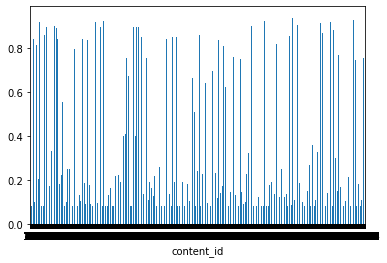

In [10]:
plt.xticks([])
difficulties = (accuracies+accuracies.mean())**0.8- accuracies.mean() #做了下缩放,向中间靠拢,避免出现0和1
difficulties.plot.bar()

In [11]:
difficulties.to_csv('difficulty.csv',header=['difficulty'])

### 单题耗时统计

In [12]:
train_df2 = train_df.sort_values(['content_id','timestamp'])

train_df2 = train_df.reset_index(drop=True)
train_df2

,timestamp,user_id,content_id,content_type_id,user_answer,answered_correctly,prior_question_elapsed_time
0,56943,115,5716,0,2,1,37000.0
1,118363,115,128,0,0,1,55000.0
2,131167,115,7860,0,0,1,19000.0
3,137965,115,7922,0,1,1,11000.0
4,157063,115,156,0,2,1,5000.0
...,...,...,...,...,...,...,...
98683972,428564420,2147482888,3586,0,0,1,18000.0
98683973,428585000,2147482888,6341,0,3,1,14000.0
98683974,428613475,2147482888,4212,0,3,1,14000.0
98683975,428649406,2147482888,6343,0,1,0,22000.0


In [13]:
train_df2 = train_df2[
    (train_df2['timestamp']!=0) &
    ( train_df2['prior_question_elapsed_time']<60000)
]
train_df2 = train_df2.dropna()
train_df2

,timestamp,user_id,content_id,content_type_id,user_answer,answered_correctly,prior_question_elapsed_time
0,56943,115,5716,0,2,1,37000.0
1,118363,115,128,0,0,1,55000.0
2,131167,115,7860,0,0,1,19000.0
3,137965,115,7922,0,1,1,11000.0
4,157063,115,156,0,2,1,5000.0
...,...,...,...,...,...,...,...
98683972,428564420,2147482888,3586,0,0,1,18000.0
98683973,428585000,2147482888,6341,0,3,1,14000.0
98683974,428613475,2147482888,4212,0,3,1,14000.0
98683975,428649406,2147482888,6343,0,1,0,22000.0


In [14]:
train_df2['content_id'].sort_values()

62427454        0
52655322        0
3603115         0
67561396        0
92017750        0
            ...  
35013319    13522
88849333    13522
21824155    13522
72602151    13522
49356106    13522
Name: content_id, Length: 94134179, dtype: int16

In [15]:
 params = train_df2.groupby(['content_id'])['prior_question_elapsed_time'].agg(['mean','var'])

In [16]:
params

,mean,var
content_id,,
0,21185.947266,38297972.0
1,21297.697266,35455212.0
2,22510.066406,49951320.0
3,22372.541016,42698524.0
4,22518.804688,30571472.0
...,...,...
13518,21912.332031,154517504.0
13519,22868.958984,161489968.0
13520,21635.677734,146872784.0


In [17]:
def gm(i,g):
    mean,var = params[i]
    return g.apply(lambda x:exp(-(x-mean)**2/(2*var))/sqrt(2*pi*var))

def zscore_trans(g):
    return (g - g.mean()) / g.std()

def get_confidences(i,g):
    g = zscore_trans(g)
    length = len(g)
    confidences = []
    
    #     plt.hist(g)
    
    # -3 ~ 0
    df_smp = (-3<=g) & (g<0)
    result = df_smp.sum()*1.0 / length
    confidences.append(result)
    
    # -3 ~ 1
    df_smp = (-3<=g) & (g<1)
    result = df_smp.sum()*1.0 / length
    confidences.append(result)
    
    # -3 ~ 2
    df_smp = (-3<=g) & (g<2)
    result = df_smp.sum()*1.0 / length
    confidences.append(result)
    
    # -3 ~ 3
    df_smp = (-3<=g) & (g<3)
    result = df_smp.sum()*1.0 / length
    confidences.append(result)
    
    # -2 ~ 1
    df_smp = (-2<=g) & (g<1)
    result = df_smp.sum()*1.0 / length
    confidences.append(result)
    
    # -2 ~ 2
    df_smp = (-2<=g) & (g<2)
    result = df_smp.sum()*1.0 / length
    confidences.append(result)
    
    # -1~ 1
    df_smp = (-1<=g) & (g<1)
    result = df_smp.sum()*1.0 / length
    confidences.append(result)
    
    # -1 ~ 2
    df_smp = (-1<=g) & (g<2)
    result = df_smp.sum()*1.0 / length
    confidences.append(result)
    
    # 0 ~ 3
    df_smp = (0<=g) & (g<3)
    result = df_smp.sum()*1.0 / length
    confidences.append(result)
    
    # -1 ~ 3
    df_smp = (-1<=g) & (g<3)
    result = df_smp.sum()*1.0 / length
    confidences.append(result)
    
    # -2~ 3
    df_smp = (-2<=g) & (g<3)
    result = df_smp.sum()*1.0 / length
    confidences.append(result)

    return confidences

In [18]:
groups2 = train_df2.groupby(['content_id'])['prior_question_elapsed_time']

In [19]:
section = ['-3~0','-3~1','-3~2','-3~3','-2~1',
            '-2~2','-1~1','-1~2','0~3','-1~3','-2~3']
conf_data = []

for i,g in groups2:
    confidences = get_confidences(i,g)
    assert len(confidences) == len(section)
    
    conf_data.append(confidences)

In [20]:
time_dist = pd.DataFrame(conf_data,columns=section)
time_dist['mean'] = params['mean']
time_dist['var'] = params['var']

time_dist

,-3~0,-3~1,-3~2,-3~3,-2~1,-2~2,-1~1,-1~2,0~3,-1~3,-2~3,mean,var
0,0.565128,0.909597,0.959853,0.977289,0.889524,0.939780,0.831209,0.881465,0.412161,0.898901,0.957216,21185.947266,38297972.0
1,0.539861,0.913852,0.962943,0.976207,0.891289,0.940380,0.823739,0.872829,0.436346,0.886093,0.953644,21297.697266,35455212.0
2,0.550722,0.900797,0.956543,0.977842,0.876330,0.932076,0.805690,0.861437,0.427120,0.882735,0.953375,22510.066406,49951320.0
3,0.564421,0.896724,0.957833,0.975141,0.873322,0.934431,0.821618,0.882727,0.410721,0.900035,0.951740,22372.541016,42698524.0
4,0.529363,0.909985,0.957794,0.973804,0.892065,0.939873,0.854474,0.902282,0.444441,0.918293,0.955884,22518.804688,30571472.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13518,0.564692,0.839178,0.949214,1.000000,0.839178,0.949214,0.686820,0.796856,0.435308,0.847642,1.000000,21912.332031,154517504.0
13519,0.571104,0.841866,0.947668,1.000000,0.841866,0.947668,0.683732,0.789534,0.428896,0.841866,1.000000,22868.958984,161489968.0
13520,0.552184,0.834951,0.944175,1.000000,0.834951,0.944175,0.667476,0.776699,0.447816,0.832524,1.000000,21635.677734,146872784.0
13521,0.582837,0.833135,0.945173,0.996424,0.833135,0.945173,0.684148,0.796186,0.413588,0.847437,0.996424,22315.771484,148294400.0


In [21]:
time_dist.to_csv('time_distribution.csv',index=None)